# Linear Regression From Scratch

In [449]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [718]:
np.random.seed(5)

num_rooms = np.random.randint(1, 8, 100)

area = np.random.uniform(500, 4000, 100)  # area in square feet

# Generate price based on the number of rooms and area with noise
price = 50 * area + 20000 * num_rooms + np.random.normal(0, 4000, 100)

total_datapoints = price.shape[0]

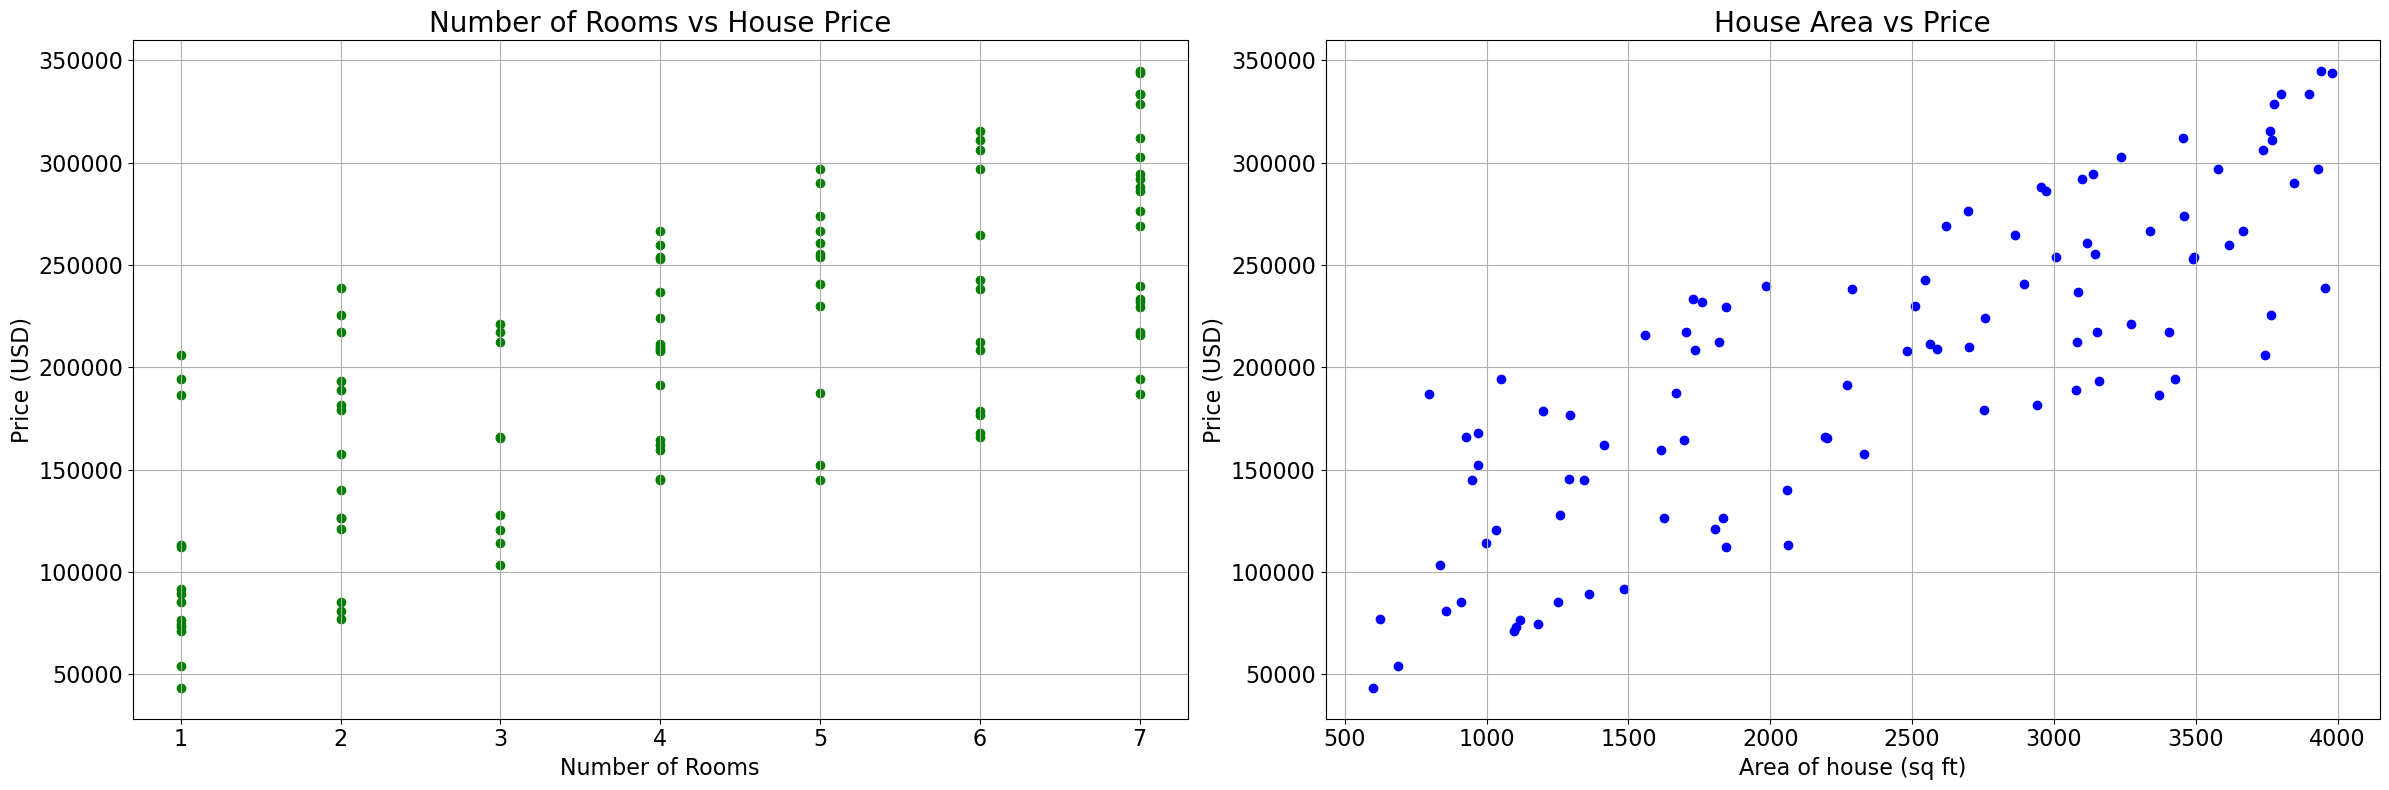

In [734]:
# Plotting the features vs target
# Set the font size for the plots
font_size = 16

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

# Plotting scatter plot for number of rooms vs price
ax[0].scatter(num_rooms, price, color='green', label='Data points')
ax[0].set_title('Number of Rooms vs House Price', fontsize=20)
ax[0].set_xlabel('Number of Rooms', fontsize=font_size)
ax[0].set_ylabel('Price (USD)', fontsize=font_size)
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)

# Plotting scatter plot for area vs price
ax[1].scatter(area, price, color='blue', label='Data points')
ax[1].set_title('House Area vs Price', fontsize=20)
ax[1].set_xlabel('Area of house (sq ft)', fontsize=font_size)
ax[1].set_ylabel('Price (USD)', fontsize=font_size)
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


In [720]:
# Preparing feature matrix
num_rooms = num_rooms.reshape(1, total_datapoints)
area = area.reshape(1, total_datapoints)
X = np.concatenate([num_rooms, area])
rows_X, columns_X = X.shape
print(f'Dimension of feature matrix X: {rows_X} x {columns_X}. ({rows_X} features and {columns_X} data points)')
total_features = rows_X

Dimension of feature matrix X: 2 x 100. (2 features and 100 data points)


In [721]:
# Preparing target vector
y = price.reshape(1, total_datapoints)
rows_y, columns_y = y.shape
print(f'Dimension of target vector y: {rows_y} x {columns_y}. ({rows_y} target variable(s) and {columns_y} data points)')

Dimension of target vector y: 1 x 100. (1 target variable(s) and 100 data points)


In [722]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.transpose(), y.transpose(), test_size=0.2, random_state=20)
y_train = y_train.transpose()
y_test = y_test.transpose()

In [723]:
# Normalizing the feature matrix
mm = MinMaxScaler()
mm.fit(X_train)
X_train = mm.transform(X_train).transpose()
X_test = mm.transform(X_test).transpose()
total_training_datapoints = X_train.shape[1]

In [724]:
print('X_train shape (features x examples):', X_train.shape)
print('X_test shape (features x examples):', X_test.shape)
print("y_train shape (target variables x examples):", y_train.shape)
print("y_test shape(target variables x examples):", y_test.shape)

X_train shape (features x examples): (2, 80)
X_test shape (features x examples): (2, 20)
y_train shape (target variables x examples): (1, 80)
y_test shape(target variables x examples): (1, 20)


In [725]:
# Initializing Weight Vector and Bias
wT = np.random.randn(1, total_features)
b = 0
rows_wT, columns_wT = wT.shape
print(f'Dimension of transposed weight vector wT: {rows_wT} x {columns_wT}. ({rows_wT} target variable(s) and {columns_wT} features)')

Dimension of transposed weight vector wT: 1 x 2. (1 target variable(s) and 2 features)


In [730]:
# Reinitializing Weight Vector and Bias
wT = np.random.randn(1, total_features)
b =  0
inv_total_training_data_points = 1/total_training_datapoints
dJ_by_dwT = np.zeros((1, total_features))
dJ_by_db = 0
alpha = 0.1
J_history = []
iteration = 0
total_iterations = 150
while iteration < total_iterations:
    iteration +=1 
    y_hat = np.matmul(wT, X_train) + b
    diff = y_hat - y_train
    diff_sq = np.square(diff)
    J = np.sum(diff_sq, axis=1)[0]
    J *= inv_total_training_data_points/2
    print(f'Iteration #{iteration}')
    print(f'Cost: {J}\n')
    J_history.append(J)
    diff_X_train = np.multiply(diff, X_train)
    dJ_by_dwT = inv_total_training_data_points * np.sum(diff_X_train, axis=1)
    dJ_by_db = inv_total_training_data_points * np.sum(diff, axis=1)
    # Updation
    wT -= alpha * dJ_by_dwT
    b -= alpha * dJ_by_db

Iteration #1
Cost: 23772741978.23296

Iteration #2
Cost: 16863558219.199982

Iteration #3
Cost: 12013713715.797535

Iteration #4
Cost: 8608630895.991302

Iteration #5
Cost: 6217154981.242142

Iteration #6
Cost: 4536810641.481224

Iteration #7
Cost: 3355397046.664927

Iteration #8
Cost: 2524045047.207322

Iteration #9
Cost: 1938315559.5442464

Iteration #10
Cost: 1524939223.1109896

Iteration #11
Cost: 1232513665.9926567

Iteration #12
Cost: 1024977213.1991978

Iteration #13
Cost: 877030395.819271

Iteration #14
Cost: 770923931.150922

Iteration #15
Cost: 694205344.4224194

Iteration #16
Cost: 638138121.2252928

Iteration #17
Cost: 596592670.8557587

Iteration #18
Cost: 565268286.4859587

Iteration #19
Cost: 541147314.6794276

Iteration #20
Cost: 522112230.3331114

Iteration #21
Cost: 506676997.19313955

Iteration #22
Cost: 493798604.9045618

Iteration #23
Cost: 482744853.5510533

Iteration #24
Cost: 473001598.3710225

Iteration #25
Cost: 464207677.58551216

Iteration #26
Cost: 45610926

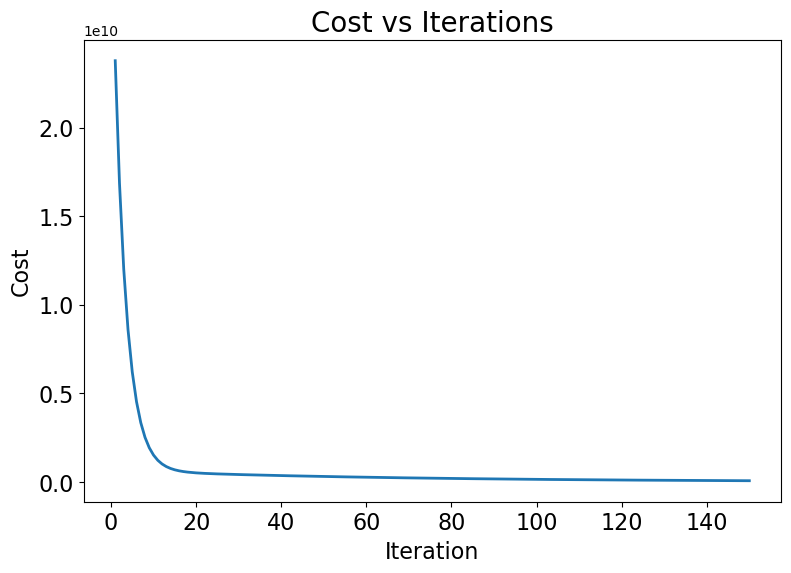

In [735]:
iterations = np.arange(1, len(J_history)+1)
plt.figure(figsize=(9, 6))
plt.plot(iterations, J_history, linewidth=2)
plt.title('Cost vs Iterations', fontsize=20)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

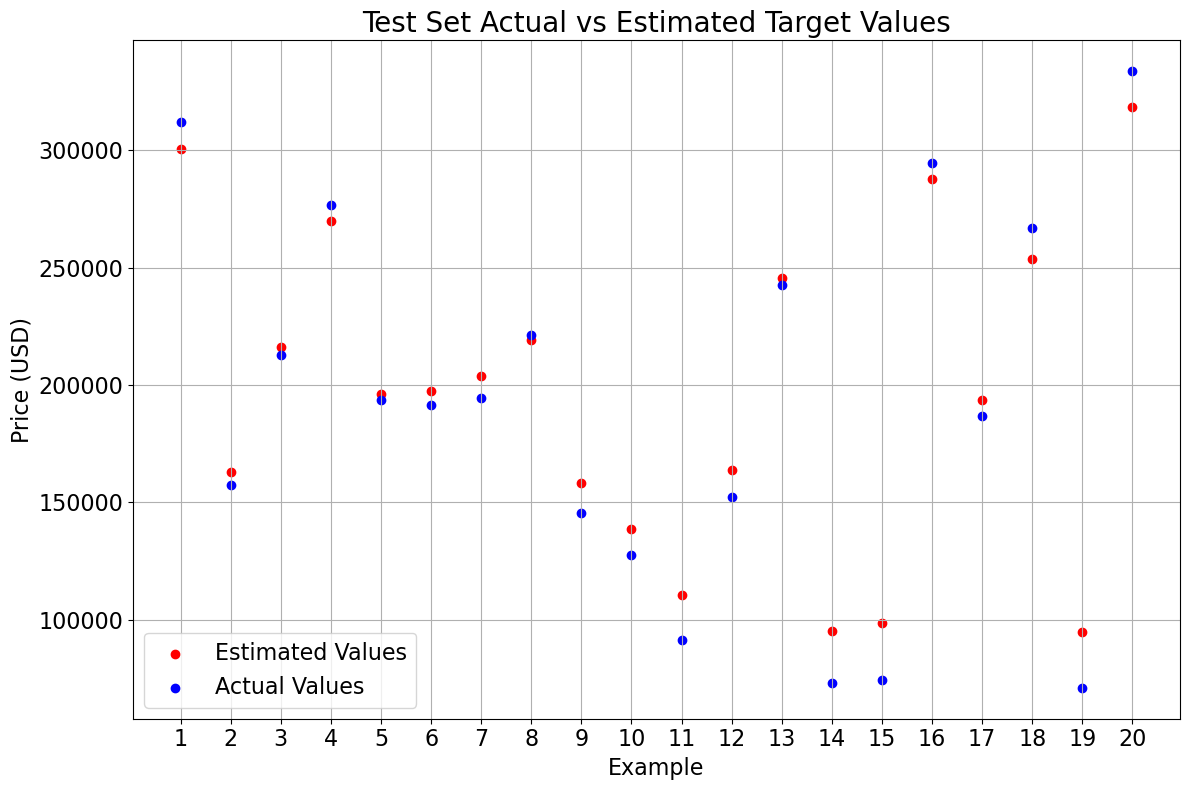

In [736]:
y_hat_test = np.matmul(wT, X_test) + b
x = np.arange(1, X_test.shape[1]+1)
plt.figure(figsize=(12, 8))
plt.scatter(x, y_hat_test, color='red', label='Estimated Values')
plt.scatter(x, y_test, color='blue', label='Actual Values')
plt.title('Test Set Actual vs Estimated Target Values', fontsize=20)
plt.xlabel('Example', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(ticks=x, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

In [733]:
mape = np.mean(np.abs((y_test - y_hat_test) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) for Test Set: {mape:.2f}%")

Mean Absolute Percentage Error (MAPE) for Test Set: 9.03%
